**Randomly choose 20% of observations from "train_labels.csv"**

In [ ]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train_data.csv')
train_labels = pd.read_csv('train_labels.csv')

# 20% sample of train_labels.csv
sample_train_labels = train_labels.sample(frac=0.2, random_state=1)
sample_train_lables.head()

**Merge this sample with “train_data.csv”**

In [ ]:
# 20% sample of train_data.csv
sample_train_data = pd.merge(sample_train_labels, train_data,on='customer_ID',how='inner')
sample_train_data.head()

sample_train_data.to_csv('sample_train_data.csv', index=False)

**Explore the data. Data Size, data type of features, a snapshot of data**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample_train_data.csv')

# Data size
print(f"Data Size: {df.shape}")

# data type of features
print(f"Data Types:\n{df.dtypes}")

#head
print(df.head())
print(f"Snapshot:\n{df.head()}")

Data Size: (1106, 191)
Data Types:
customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 191, dtype: object
                                         customer_ID  target         S_2  \
0  19f2288c04bc71bbf67fbdc9bbfb539803c8d628845f9b...       0  2017-08-08   
1  afb2974efdf3abbe7f13f110d66de91d62f84e777f2908...       0  2018-03-16   
2  019bfdcdd3618bb6c2ee4ee27e212bd8fdb6ee4ee8c4b4...       0  2017-12-20   
3  fb6c8e102405adf305c505a54e665a47d0b713f56a4915...       1  2017-11-26   
4  20ebe898ee384d68a424ef7dd86c9be1ce3ed181e0f491...       0  2017-10-30   

        P_2      D_39       B_1       B_2       R_1       S_3      D_41  ...  \
0  0.952106  0.006830  0.007750  0.817398  0.000341       NaN  0.002549  ...   
1  0.838285  0.003378  0.009451  0.818851  0.001573       NaN  0.002

In [2]:
# Convert 'S_2' column to datetime
df['S_2'] = pd.to_datetime(df['S_2'])

In [3]:
df['S_2'].head()

0   2017-08-08
1   2018-03-16
2   2017-12-20
3   2017-11-26
4   2017-10-30
Name: S_2, dtype: datetime64[ns]

**Imputing the missing values**

*Number of misssing values*

In [4]:
missing_values = df.isnull().sum()
print("Missing Values Count: \n", missing_values)

Missing Values Count: 
 customer_ID      0
target           0
S_2              0
P_2              7
D_39             0
              ... 
D_141           18
D_142          916
D_143           18
D_144            6
D_145           18
Length: 191, dtype: int64


*Replace numerical columns with mean and categorical columns with mode*

In [5]:
categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])
    
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())

In [6]:
missing_values = df.isnull().sum()
print("Missing Values Count: \n", missing_values)

Missing Values Count: 
 customer_ID    0
target         0
S_2            0
P_2            0
D_39           0
              ..
D_141          0
D_142          0
D_143          0
D_144          0
D_145          0
Length: 191, dtype: int64


**One-Hot Encoding**

In [3]:

columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
df_encoded = pd.get_dummies(data, columns=columns_to_encode, prefix=columns_to_encode)

NameError: name 'data' is not defined

In [8]:
df_encoded.to_csv('df_encoded.csv', index=False)

In [9]:
df2 = pd.read_csv('df_encoded.csv')
df2.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,19f2288c04bc71bbf67fbdc9bbfb539803c8d628845f9b...,0,2017-08-08,0.952106,0.006830,0.007750,0.817398,0.000341,0.217330,0.002549,...,0,0,1,0,0,0,0,0,0,1
1,afb2974efdf3abbe7f13f110d66de91d62f84e777f2908...,0,2018-03-16,0.838285,0.003378,0.009451,0.818851,0.001573,0.217330,0.002360,...,0,0,1,0,0,0,0,0,1,0
2,019bfdcdd3618bb6c2ee4ee27e212bd8fdb6ee4ee8c4b4...,0,2017-12-20,0.850569,0.302643,0.018813,1.008960,0.000978,0.132243,0.002743,...,0,0,1,0,0,0,0,0,0,1
3,fb6c8e102405adf305c505a54e665a47d0b713f56a4915...,1,2017-11-26,0.446003,0.000986,0.114735,0.076269,0.001983,0.350972,0.001733,...,1,0,1,0,0,0,0,0,1,0
4,20ebe898ee384d68a424ef7dd86c9be1ce3ed181e0f491...,0,2017-10-30,0.651073,0.622973,0.130193,0.266888,0.518292,0.165631,0.002417,...,0,0,1,0,0,0,0,0,0,1


In [10]:
print(df2.columns)

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=224)


**Defining new features**

In [11]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns D_*, S_*, P_*, B_*, and R_*
# Replace 'df' with your actual DataFrame name

# Delinquency Average (D_Avg) excluding specified columns
delinquency_columns = [col for col in df.columns if col.startswith('D_') and col not in ['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]
df2['D_Avg'] = df[delinquency_columns].mean(axis=1)

# Spend Average (S_Avg) excluding S_2
spend_columns = [col for col in df.columns if col.startswith('S_') and col != 'S_2']
df2['S_Avg'] = df[spend_columns].mean(axis=1)

# Payment Average (P_Avg)
payment_columns = [col for col in df.columns if col.startswith('P_')]
df2['P_Avg'] = df[payment_columns].mean(axis=1)

# Balance Average (B_Avg) excluding specified columns
balance_columns = [col for col in df.columns if col.startswith('B_') and col not in ['B_30', 'B_38']]
df2['B_Avg'] = df[balance_columns].mean(axis=1)

# Risk Average (R_Avg)
risk_columns = [col for col in df.columns if col.startswith('R_')]
df2['R_Avg'] = df[risk_columns].mean(axis=1)

# Now, 'D_Avg', 'S_Avg', 'P_Avg', 'B_Avg', and 'R_Avg' are added as new columns to your DataFrame


In [12]:
print(df2)

                                            customer_ID  target         S_2  \
0     19f2288c04bc71bbf67fbdc9bbfb539803c8d628845f9b...       0  2017-08-08   
1     afb2974efdf3abbe7f13f110d66de91d62f84e777f2908...       0  2018-03-16   
2     019bfdcdd3618bb6c2ee4ee27e212bd8fdb6ee4ee8c4b4...       0  2017-12-20   
3     fb6c8e102405adf305c505a54e665a47d0b713f56a4915...       1  2017-11-26   
4     20ebe898ee384d68a424ef7dd86c9be1ce3ed181e0f491...       0  2017-10-30   
...                                                 ...     ...         ...   
1101  982106b8b7c2628d4f09a882643661a202b4bcf8bf4cfa...       1  2017-07-14   
1102  40a9928cea9880d517398ec6fdc736e7535fe6663f02b3...       0  2018-03-31   
1103  71248f965b357a76ff05e962914abbdb7d3c0cb94cf2b5...       0  2017-07-10   
1104  94853b18179ff80a65b253c92b0e4275db1d2f63bce074...       0  2017-07-22   
1105  784b2970a958963d0d3a4b40fb2a84b778c80ef63316da...       0  2018-01-02   

           P_2      D_39       B_1       B_2       

In [13]:
print(df2.columns)

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_68_2.0', 'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0', 'D_Avg',
       'S_Avg', 'P_Avg', 'B_Avg', 'R_Avg'],
      dtype='object', length=229)


**Splitting the data**

In [14]:
from sklearn.model_selection import train_test_split

# 70% train set and a 30% test set
train_set, test_set = train_test_split(df2, test_size=0.3, random_state=42)

# Split test set into a 15% test1 set and a 15% test2 set
test1_set, test2_set = train_test_split(test_set, test_size=0.5, random_state=42)

#resulting sets
print("Train set shape:", train_set.shape)
print("Test1 set shape:", test1_set.shape)
print("Test2 set shape:", test2_set.shape)


Train set shape: (774, 229)
Test1 set shape: (166, 229)
Test2 set shape: (166, 229)


**XGBoost setup**

In [15]:
!pip install xgboost

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Split data into features (X) and target (y)
X = train_set.drop(columns=['target','S_2','customer_ID'])
y = train_set['target']

**XGBoost model with default parameters**

In [17]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# missing values
X_train.fillna(np.nan, inplace=True)
X_test.fillna(np.nan, inplace=True)

# XGBClassifier object
xg_clf = xgb.XGBClassifier(use_label_encoder=False)

# Fit the classifier to the training data
xg_clf.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Feature Importance**

In [18]:
feature_importances = xg_clf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df.to_csv('feature_importances.csv', index=False)
print (features_df.to_string())

        Feature  Importance
0           P_2    0.085065
1          D_39    0.000508
2           B_1    0.001408
3           B_2    0.001490
4           R_1    0.007729
5           S_3    0.004153
6          D_41    0.012401
7           B_3    0.024768
8          D_42    0.024512
9          D_43    0.016045
10         D_44    0.002668
11          B_4    0.000000
12         D_45    0.000000
13          B_5    0.003968
14          R_2    0.007054
15         D_46    0.014268
16         D_47    0.015507
17         D_48    0.034329
18         D_49    0.000000
19          B_6    0.000000
20          B_7    0.000000
21          B_8    0.000709
22         D_50    0.000000
23         D_51    0.002868
24          B_9    0.003120
25          R_3    0.011194
26         D_52    0.006036
27          P_3    0.000651
28         B_10    0.000000
29         D_53    0.007052
30          S_5    0.022897
31         B_11    0.000000
32          S_6    0.003901
33         D_54    0.002919
34          R_4    0

**XGBoost model with given parameters**

In [19]:
from sklearn.utils.class_weight import compute_sample_weight

#weights for the target variable
weights = compute_sample_weight(class_weight={0:1, 1:5}, y=y_train)

# Create an XGBClassifier object
xg_clf2 = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.5,
    max_depth=4,
    subsample=0.5,
    colsample_bytree=0.5,
    use_label_encoder=False
)

# Fit the classifier to the training data
xg_clf2.fit(X_train, y_train, sample_weight=weights)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Feature Importance**

In [20]:
# feature importance
feature_importances2 = xg_clf2.feature_importances_

features_importances2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances2
})

features_importances2.to_csv('feature_importances2.csv', index=False)
print (features_importances2.to_string())

        Feature  Importance
0           P_2    0.064741
1          D_39    0.000000
2           B_1    0.000000
3           B_2    0.000434
4           R_1    0.001168
5           S_3    0.019812
6          D_41    0.002237
7           B_3    0.006155
8          D_42    0.021527
9          D_43    0.014676
10         D_44    0.004504
11          B_4    0.000277
12         D_45    0.000371
13          B_5    0.002855
14          R_2    0.012541
15         D_46    0.001664
16         D_47    0.010839
17         D_48    0.039507
18         D_49    0.000000
19          B_6    0.000000
20          B_7    0.002495
21          B_8    0.001840
22         D_50    0.000000
23         D_51    0.008647
24          B_9    0.008646
25          R_3    0.003398
26         D_52    0.008377
27          P_3    0.004544
28         B_10    0.000118
29         D_53    0.017204
30          S_5    0.020963
31         B_11    0.000000
32          S_6    0.001938
33         D_54    0.006925
34          R_4    0

In [21]:
# Sort features_importances2 by 'Importance' in descending order
sorted_features_importances2 = features_importances2.sort_values(by='Importance', ascending=False)

# Get the top 5 features
top_5_features = sorted_features_importances2.head(5)

# Calculate the requested statistics for the top 5 features
statistics = {
    'Feature': top_5_features['Feature'],
    'Min': [],
    '1st Percentile': [],
    '5th Percentile': [],
    'Median': [],
    '95th Percentile': [],
    '99th Percentile': [],
    'Max': [],
    'Mean': [],
    '% Missing': []
}

for feature in top_5_features['Feature']:
    # Calculate statistics for the feature
    min_value = df2[feature].min()
    percentile_1 = df2[feature].quantile(0.01)
    percentile_5 = df2[feature].quantile(0.05)
    median = df2[feature].median()
    percentile_95 = df2[feature].quantile(0.95)
    percentile_99 = df2[feature].quantile(0.99)
    max_value = df2[feature].max()
    mean = df2[feature].mean()
    missing_percentage = (df2[feature].isnull().mean()) * 100

    # Append values to the statistics dictionary
    statistics['Min'].append(min_value)
    statistics['1st Percentile'].append(percentile_1)
    statistics['5th Percentile'].append(percentile_5)
    statistics['Median'].append(median)
    statistics['95th Percentile'].append(percentile_95)
    statistics['99th Percentile'].append(percentile_99)
    statistics['Max'].append(max_value)
    statistics['Mean'].append(mean)
    statistics['% Missing'].append(missing_percentage)

# Create a DataFrame from the statistics dictionary
top_5_feature_statistics = pd.DataFrame(statistics)

# Print the statistics for the top 5 features
print(top_5_feature_statistics)


    Feature       Min  1st Percentile  5th Percentile    Median  \
0       P_2 -0.136627        0.014908        0.236069  0.695273   
17     D_48 -0.004654        0.002627        0.016767  0.374200   
56     B_20  0.000002        0.000187        0.000888  0.008372   
38     D_55  0.000248        0.002215        0.008273  0.190922   
129   D_103  0.000006        0.000239        0.001096  0.009900   

     95th Percentile  99th Percentile       Max      Mean  % Missing  
0           0.966178         1.004166  1.009898  0.658426        0.0  
17          0.933638         0.984735  1.134253  0.374411        0.0  
56          1.006336         1.008939  1.009892  0.232326        0.0  
38          0.871996         1.026036  1.436484  0.297460        0.0  
129         1.008824         1.009770  1.009989  0.490416        0.0  


**Features with feature importance of higher 0.5% in any of the two models**

In [22]:
features_default_model = pd.read_csv('feature_importances.csv')
features_parameters_model = pd.read_csv('feature_importances2.csv')

threshold = 0.5 / 100  

#features that meet the threshold in both models
features_default_model_above_threshold = features_default_model[features_default_model['Importance'] > threshold]['Feature']
features_parameters_model_above_threshold = features_parameters_model[features_parameters_model['Importance'] > threshold]['Feature']

# Combining the features from both models
selected_features_df = pd.concat([features_default_model_above_threshold, features_parameters_model_above_threshold]).drop_duplicates().reset_index(drop=True)

selected_features_df.to_csv('selected_features_df.csv', index=False)



In [23]:
selected_features = selected_features_df.tolist()  # (converting pandas series to list)selected
df3 = df2[selected_features]

In [24]:
df3.head()

,P_2,R_1,D_41,B_3,D_42,D_43,R_2,D_46,D_47,D_48,...,D_112,D_119,D_124,D_129,D_131,D_139,D_142,D_144,P_Avg,B_Avg
0,0.952106,0.000341,0.002549,0.004538,0.192096,0.070317,0.008067,0.476357,0.489047,0.374411,...,1.000786,0.629443,0.145341,0.008729,0.009824,1.005263,0.892046,1.003621,0.559213,0.135581
1,0.838285,0.001573,0.002360,0.002085,0.192096,0.041391,0.005375,0.476357,0.111964,0.124475,...,1.006283,0.160460,0.006584,0.005382,0.004034,1.006692,0.299482,0.008062,0.515581,0.169696
2,0.850569,0.000978,0.002743,0.003825,0.192096,0.151929,0.006100,0.440366,0.386611,0.013712,...,1.000643,0.798512,0.006228,0.007306,0.005804,0.000541,0.414144,0.008781,0.495196,0.152239
3,0.446003,0.001983,0.001733,0.126152,0.218584,0.092902,0.001781,0.487935,0.182341,0.575451,...,1.002467,0.004400,0.414803,0.006453,0.000624,0.006414,0.414144,0.003733,0.637075,0.161539
4,0.651073,0.518292,0.002417,0.117436,0.192096,0.205960,0.008466,0.506387,0.379591,0.603235,...,1.009632,0.331499,0.323869,1.006943,0.978709,0.004322,0.414144,0.002431,0.383251,0.194320


**Grid Search for the XGBoost model (using only chosen features) with given parameters**

*Setup*

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

X = df3
y = df2['target']
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

# Grid parameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}


*Fit the model*

In [26]:
# XGBClassifier object
xg_clf3 = XGBClassifier(use_label_encoder=False)

# GridSearchCV object
grid_search = GridSearchCV(estimator=xg_clf3, param_grid=param_grid, cv=3, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc')

*Best Parameters from the GridSearchCV object*

In [27]:
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.01,
 'n_estimators': 300,
 'scale_pos_weight': 1,
 'subsample': 0.5}

*Prepare table*

In [28]:
from sklearn.metrics import roc_auc_score

# Create an empty DataFrame
results_df = pd.DataFrame(columns=['# Trees', 'LR', 'Subsample %', 'Features', '% Weight of Default', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# Iterate over each combination of settings
for i, params in enumerate(grid_search.cv_results_['params']):
    
    # Fit model with current parameters
    xg_clf3.set_params(**params)
    xg_clf3.fit(X_train, y_train)
    
    # Predict probabilities for each set
    train_pred = xg_clf3.predict_proba(X_train)[:, 1]
    test1_pred = xg_clf3.predict_proba(X_test1)[:, 1]
    test2_pred = xg_clf3.predict_proba(X_test2)[:, 1]
    
    # Calculate AUC for each set
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test1 = roc_auc_score(y_test1, test1_pred)
    auc_test2 = roc_auc_score(y_test2, test2_pred)
    
    # Create a temporary DataFrame
    temp_df = pd.DataFrame({
        '# Trees': params['n_estimators'],
        'LR': params['learning_rate'],
        'Subsample %': [f'{params["subsample"] * 100}%'],
        'Features': [f'{params["colsample_bytree"] * 100}%'],
        '% Weight of Default': [params['scale_pos_weight']],
        'AUC Train': [auc_train],
        'AUC Test 1': [auc_test1],
        'AUC Test 2': [auc_test2]
    })
    
    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df.to_csv('grid_search_XGBoost.csv', index=False)
results_df


,# Trees,LR,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.983845,0.878442,0.915079
1,50,0.01,80.0%,50.0%,1,0.994216,0.884964,0.916468
2,50,0.01,50.0%,50.0%,5,0.987458,0.882971,0.907738
3,50,0.01,80.0%,50.0%,5,0.996687,0.888768,0.914286
4,50,0.01,50.0%,50.0%,10,0.979833,0.891123,0.908730
...,...,...,...,...,...,...,...,...
67,300,0.10,80.0%,100.0%,1,1.000000,0.884058,0.930357
68,300,0.10,50.0%,100.0%,5,1.000000,0.893116,0.915476
69,300,0.10,80.0%,100.0%,5,1.000000,0.884058,0.924603
70,300,0.10,50.0%,100.0%,10,1.000000,0.889674,0.913492


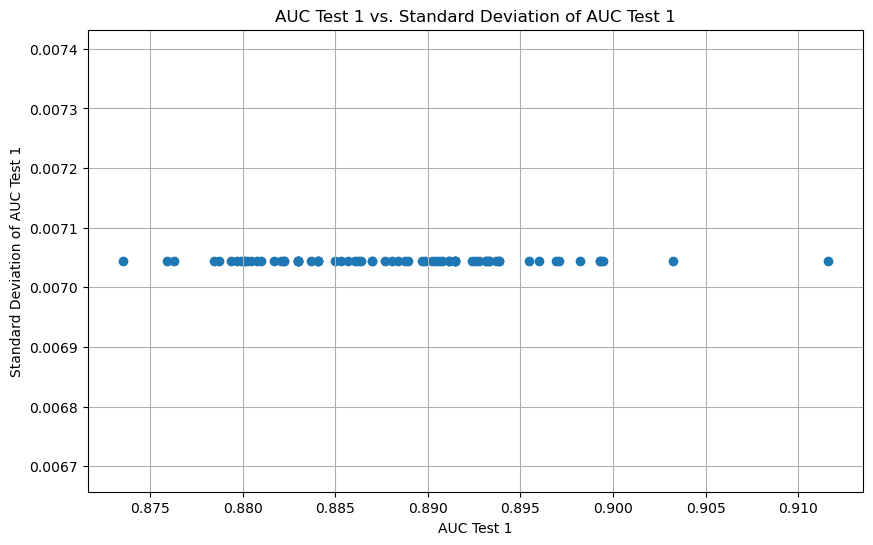

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Extract AUC Test 1 and its standard deviation
auc_test1 = results_df['AUC Test 1']
std_auc_test1 = results_df['AUC Test 1'].std()

# Create an array of the same length as x_values with the standard deviation value
std_values = np.full_like(auc_test1, std_auc_test1)

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(auc_test1, std_values, marker='o')
plt.xlabel('AUC Test 1')
plt.ylabel('Standard Deviation of AUC Test 1')
plt.title('AUC Test 1 vs. Standard Deviation of AUC Test 1')
plt.grid(True)
plt.show()


**Choose the best model, based on bias and variance ; Re-run the model with optimum parameters**

In [29]:
# Find the row with the highest average AUC
best_model_row = results_df.loc[results_df['AUC Test 1'].idxmax()]

best_model_params = {
    'n_estimators': best_model_row['# Trees'],
    'learning_rate': best_model_row['LR'],
    'subsample': float(best_model_row['Subsample %'][:-1]) / 100.0,
    'colsample_bytree': float(best_model_row['Features'][:-1]) / 100.0,
    'scale_pos_weight': best_model_row['% Weight of Default']
}

# Print information about the best model
print("Best Model Parameters:")
print(best_model_row)


Best Model Parameters:
# Trees                      50
LR                          0.1
Subsample %               80.0%
Features                  50.0%
% Weight of Default           1
AUC Train                   1.0
AUC Test 1             0.911594
AUC Test 2             0.922222
Name: 19, dtype: object


**Re-run the model with optimum parameters**

In [30]:
xg_best_model = XGBClassifier(**best_model_params)
xg_best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

*Save to file*

In [31]:
xg_best_model.save_model('xgb_best_model.json')

**Neural Network**

**#Data Processing (We will use only features that we chose in step 10)**

In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Find the 1st and 99th percentiles for outlier treatment
Q1 = df3.quantile(0.01)
Q99 = df3.quantile(0.99)

# Cap and floor the values based on the 1st and 99th percentiles
df3 = df3.clip(Q1, Q99, axis=1)

# Replace missing values with 0
df3.fillna(0, inplace=True)

# Apply StandardScaler to normalize the data
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3)

# Convert the numpy array back to a DataFrame
df3_scaled = pd.DataFrame(df3_scaled, columns=selected_features)

# Display the first few rows of the processed DataFrame
df3_scaled.head()


,P_2,R_1,D_41,B_3,D_42,D_43,R_2,D_46,D_47,D_48,...,D_112,D_119,D_124,D_129,D_131,D_139,D_142,D_144,P_Avg,B_Avg
0,1.230267,-0.343392,-0.317740,-0.551914,0.025955,-0.587999,-0.204683,0.002469,0.323218,0.001939,...,0.398993,1.472233,-0.759960,-0.891894,-0.310068,2.191870,3.847772,5.419180,0.668549,-1.002463
1,0.752592,-0.337519,-0.319050,-0.562145,0.025955,-0.804500,-0.217519,0.002469,-1.241372,-0.817533,...,0.414682,-0.476584,-1.386304,-0.898690,-0.330295,2.195661,-1.183604,-0.241488,0.343031,-0.486007
2,0.804143,-0.340354,-0.316400,-0.554886,0.025955,0.022837,-0.214059,-0.338593,-0.101807,-1.180694,...,0.398585,2.174785,-1.387909,-0.894784,-0.324113,-0.474828,0.016009,-0.237402,0.190944,-0.750287
3,-0.893711,-0.335568,-0.323388,-0.044635,0.453459,-0.418962,-0.234655,0.112180,-0.949363,0.661095,...,0.403791,-1.125078,0.456379,-0.896516,-0.342210,-0.459242,0.016009,-0.266103,1.249447,-0.609492
4,-0.033087,2.123792,-0.318654,-0.080994,0.025955,0.427234,-0.202778,0.287035,-0.130934,0.752189,...,0.424239,0.234152,0.045908,1.134707,3.074985,-0.464792,0.016009,-0.273509,-0.644228,-0.113235


In [33]:
X = df3_scaled
y = df2['target']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
import tensorflow as tf

In [35]:

results_df = pd.DataFrame(columns=['# HL', '# Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# hyperparameters
n_layers_values = [2, 4]
n_nodes_values = [4, 6]
activation_functions = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]  # 50% dropout and no dropout
batch_sizes = [100, 10000]
epochs = 20

# Loop over each number of hidden layers
for n_layers in n_layers_values:
    for n_node in n_nodes_values:
        for activation in activation_functions:
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    # Build and compile the model
                    model = tf.keras.models.Sequential()
                    model.add(tf.keras.layers.Dense(n_node, activation=activation, input_shape=(X_train.shape[1],)))
                    for _ in range(n_layers - 1):
                        model.add(tf.keras.layers.Dense(n_node, activation=activation))
                        if dropout < 1.0:
                            model.add(tf.keras.layers.Dropout(dropout))
                    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
                    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

                    # Train the model
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Evaluate the model
                    auc_train = roc_auc_score(y_train, model.predict(X_train))
                    auc_test1 = roc_auc_score(y_test1, model.predict(X_test1))
                    auc_test2 = roc_auc_score(y_test2, model.predict(X_test2))

                    # Create a DataFrame from the results
                    result_dict = {
                        '# HL': n_layers,
                        '# Node': n_node,
                        'Activation Function': activation,
                        'Dropout': f"{int((1 - dropout) * 100)}%",
                        'Batch Size': batch_size,
                        'AUC Train': auc_train,
                        'AUC Test 1': auc_test1,
                        'AUC Test 2': auc_test2
                    }

                    result_df = pd.DataFrame([result_dict])

                    # Concatenate the DataFrame to results_df
                    results_df = pd.concat([results_df, result_df], ignore_index=True)

                    # Save the results after each iteration
                    results_df.to_csv('grid_search_results.csv', index=False)

                    print(f"Model with {n_layers} layers, {n_node} nodes per layer, {activation} activation, "
                          f"{int((1 - dropout) * 100)}% dropout, and batch size {batch_size} finished training. "
                          f"Train AUC: {auc_train}, Test AUC 1: {auc_test1}, Test AUC 2: {auc_test2}")


6/6 [==============================] - 0s 2ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 100 finished training. Train AUC: 0.8978521766086532, Test AUC 1: 0.8728260869565218, Test AUC 2: 0.9115079365079364
6/6 [==============================] - 0s 2ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 50% dropout, and batch size 10000 finished training. Train AUC: 0.6805411629245826, Test AUC 1: 0.41286231884057967, Test AUC 2: 0.2910714285714286
6/6 [==============================] - 0s 2ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 100 finished training. Train AUC: 0.9329347681679288, Test AUC 1: 0.8692028985507246, Test AUC 2: 0.9001984126984127
6/6 [==============================] - 0s 2ms/step
Model with 2 layers, 4 nodes per layer, relu activation, 0% dropout, and batch size 10000 finished training. Train AUC: 0.7792214693769097, Test AUC 1: 0.5204710144927537, Test AUC 2: 0.53

In [36]:
results_df

,# HL,# Node,Activation Function,Dropout,Batch Size,AUC Train,AUC Test 1,AUC Test 2
0,2,4,relu,50%,100,0.897852,0.872826,0.911508
1,2,4,relu,50%,10000,0.680541,0.412862,0.291071
2,2,4,relu,0%,100,0.932935,0.869203,0.900198
3,2,4,relu,0%,10000,0.779221,0.520471,0.533333
4,2,4,tanh,50%,100,0.934122,0.887862,0.895833
5,2,4,tanh,50%,10000,0.775422,0.753986,0.732143
6,2,4,tanh,0%,100,0.943138,0.877899,0.911310
7,2,4,tanh,0%,10000,0.591719,0.621196,0.641468
8,2,6,relu,50%,100,0.917966,0.855616,0.886905
9,2,6,relu,50%,10000,0.811939,0.702899,0.789484


*Identify the best model*

In [37]:
# highest AUC Test score
best_model_select = results_df.loc[results_df['AUC Test 1'].idxmax()]
best_model_select

# HL                          2
# Node                        6
Activation Function        tanh
Dropout                      0%
Batch Size                  100
AUC Train              0.939684
AUC Test 1              0.89529
AUC Test 2             0.923611
Name: 14, dtype: object

*parameters of the best model*

In [38]:
# hyperparameters of the best model
best_n_layers = int(best_model_select['# HL'])
best_n_nodes = int(best_model_select['# Node'])
best_activation = best_model_select['Activation Function']
best_dropout = float(best_model_select['Dropout'].strip('%')) / 100.0
best_batch_size = int(best_model_select['Batch Size'])


*re-run the model with optimum parameters*

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# best model with optimum parameters
final_nn_model = Sequential()
final_nn_model.add(Dense(best_n_nodes, activation=best_activation, input_shape=(X_train.shape[1],)))
for _ in range(best_n_layers - 1):
    final_nn_model.add(Dense(best_n_nodes, activation=best_activation))
    if best_dropout < 1.0:
        final_nn_model.add(Dropout(best_dropout))
final_nn_model.add(Dense(1, activation='sigmoid'))

# Compile the best model
final_nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Train the best model on the entire training set
final_nn_model.fit(X_train, y_train, epochs=20, batch_size=best_batch_size, verbose=1)

final_nn_model.save('final_nn_model.keras')


Epoch 1/20
8/8 [==============================] - 1s 2ms/step - loss: 0.6277 - auc: 0.7339
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - loss: 0.5693 - auc: 0.8043
Epoch 3/20
8/8 [==============================] - 0s 3ms/step - loss: 0.5282 - auc: 0.8405
Epoch 4/20
8/8 [==============================] - 0s 2ms/step - loss: 0.4965 - auc: 0.8648
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4742 - auc: 0.8782
Epoch 6/20
8/8 [==============================] - 0s 3ms/step - loss: 0.4556 - auc: 0.8885
Epoch 7/20
8/8 [==============================] - 0s 3ms/step - loss: 0.4401 - auc: 0.8970
Epoch 8/20
8/8 [==============================] - 0s 2ms/step - loss: 0.4266 - auc: 0.9033
Epoch 9/20
8/8 [==============================] - 0s 2ms/step - loss: 0.4142 - auc: 0.9090
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 0.4022 - auc: 0.9137
Epoch 11/20
8/8 [==============================] - 0s 3ms/step - loss: 0.3915 - auc: 0.91

**Choose the best model among NN and XGB**

*Method 1 - compare performance scores of both best models*

In [40]:
# AUC scores from best_model_row
auc_test1_model_row = best_model_row['AUC Test 1']
auc_test2_model_row = best_model_row['AUC Test 2']

# average AUC score for best_model_row
best_model_row_avg_auc = (auc_test1_model_row + auc_test2_model_row) / 2
print("Avg AUC value of XGB Model :",best_model_row_avg_auc)

# AUC scores from best_model_select
auc_test1_model_select = best_model_select['AUC Test 1']
auc_test2_model_select = best_model_select['AUC Test 2']

# average AUC score for best_model_select
best_model_select_avg_auc = (auc_test1_model_select + auc_test2_model_select) / 2
print("Avg AUC value of NN Model :",best_model_select_avg_auc)

# Determine the best model and label the AUC values
if best_model_row_avg_auc > best_model_select_avg_auc:
    best_model = "XGB Model"  # XGBoost model is better
    best_avg_auc = best_model_row_avg_auc
    model_label = "Avg AUC value of "
else:
    best_model = "NN Model"  # Neural Network model is better
    best_avg_auc = best_model_select_avg_auc
    model_label = "Avg AUC value of "


print(f"The best model is {best_model} with {model_label}: {best_avg_auc:.5f}")


Avg AUC value of XGB Model : 0.9169082125603865
Avg AUC value of NN Model : 0.9094504830917873
The best model is XGB Model with Avg AUC value of : 0.91691


*Method 2 : Run the model and Compare the results*

In [41]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import load_model

# trained NN model
final_nn_model = load_model('final_nn_model.keras')

# trained XGBoost model
final_xgb_model = xgb.Booster(model_file='xgb_best_model.json')

# Make predictions using the NN model
nn_predictions = final_nn_model.predict(X_test)
nn_auc = roc_auc_score(y_test, nn_predictions)

# Make predictions using the XGB model
xgb_predictions = final_xgb_model.predict(xgb.DMatrix(X_test))
xgb_auc = roc_auc_score(y_test, xgb_predictions)

# Compare models based on ROC AUC
if nn_auc > xgb_auc:
    best_model = "NN"
    best_auc = nn_auc
else:
    best_model = "XGB"
    best_auc = xgb_auc

# results
print(f'ROC AUC - NN Model: {nn_auc:.4f}')
print(f'ROC AUC - XGBoost Model: {xgb_auc:.4f}')
print(f'Best Model: {best_model} (ROC AUC = {best_auc:.4f})')

# Save the best model
if best_model == "NN":
    final_nn_model.save('best_model.h5')
else:
    final_xgb_model.save_model('xgb_best_model.json')


11/11 [==============================] - 0s 1ms/step
ROC AUC - NN Model: 0.8776
ROC AUC - XGBoost Model: 0.8206
Best Model: NN (ROC AUC = 0.8776)


C:\anaconda\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Strategy**

In [42]:
import xgboost as xgb

# Load the XGBoost model
xgb_model = xgb.Booster(model_file='xgb_best_model.json')


**Portfolios default rate - each strategy - each time frame**

In [43]:
# Make predictions using the XGBoost model on X_test1
xgb_predictions_test1 = xgb_model.predict(xgb.DMatrix(X_test1))

# Make predictions using the XGBoost model on X_test2
xgb_predictions_test2 = xgb_model.predict(xgb.DMatrix(X_test2))

# Define conservative and aggressive thresholds
conservative_threshold = 0.2
aggressive_threshold = 0.3

# Calculate the default rate for the conservative strategy on X_test1
accepted_indices_conservative_test1 = np.where(xgb_predictions_test1 < conservative_threshold)[0]
default_rate_conservative_test1 = np.mean(y_test1.iloc[accepted_indices_conservative_test1])

# Calculate the default rate for the aggressive strategy on X_test1
accepted_indices_aggressive_test1 = np.where(xgb_predictions_test1 < aggressive_threshold)[0]
default_rate_aggressive_test1 = np.mean(y_test1.iloc[accepted_indices_aggressive_test1])

# Calculate the default rate for the conservative strategy on X_test2
accepted_indices_conservative_test2 = np.where(xgb_predictions_test2 < conservative_threshold)[0]
default_rate_conservative_test2 = np.mean(y_test2.iloc[accepted_indices_conservative_test2])

# Calculate the default rate for the aggressive strategy on X_test2
accepted_indices_aggressive_test2 = np.where(xgb_predictions_test2 < aggressive_threshold)[0]
default_rate_aggressive_test2 = np.mean(y_test2.iloc[accepted_indices_aggressive_test2])

# Print the default rates for both strategies on both test sets
print("Default Rate - Conservative Strategy (Test Set 1):", default_rate_conservative_test1)
print("Default Rate - Aggressive Strategy (Test Set 1):", default_rate_aggressive_test1)
print("Default Rate - Conservative Strategy (Test Set 2):", default_rate_conservative_test2)
print("Default Rate - Aggressive Strategy (Test Set 2):", default_rate_aggressive_test2)


Default Rate - Conservative Strategy (Test Set 1): 0.06666666666666667
Default Rate - Aggressive Strategy (Test Set 1): 0.07017543859649122
Default Rate - Conservative Strategy (Test Set 2): 0.044642857142857144
Default Rate - Aggressive Strategy (Test Set 2): 0.06611570247933884


In [44]:
import pandas as pd

# Assuming the 'S_2' column contains date values
df2['S_2'] = pd.to_datetime(df2['S_2'])

# Define the date ranges
date_ranges = [
    ('2017-05-01', '2018-01-31'),  # May '17 to Jan '18
    ('2017-03-01', '2017-04-30'),  # Mar '17 to Apr '17
    ('2018-02-01', '2018-03-31'),  # Feb '18 to Mar '18
    ('2017-05-01', '2018-03-31')   # May '17 to Mar '18
]

# Define the conservative and aggressive thresholds
conservative_threshold = 0.2
aggressive_threshold = 0.3

# Create a dictionary to store the default rates for each date range and strategy
default_rates_by_date_range = {}

# Iterate through the date ranges and calculate default rates for each strategy
for start_date_str, end_date_str in date_ranges:
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    
    # Filter the DataFrame for the current date range
    date_range_df = df2[(df2['S_2'] >= start_date) & (df2['S_2'] <= end_date)]
    
    # Calculate the accepted indices based on your conservative and aggressive strategies within the date range
    accepted_indices_conservative = np.where(xgb_predictions_test1 < conservative_threshold)[0]
    accepted_indices_aggressive = np.where(xgb_predictions_test1 < aggressive_threshold)[0]
    
    # Calculate the default rate for the conservative strategy within the date range
    default_rate_conservative = np.mean(y_test1.iloc[accepted_indices_conservative])
    
    # Calculate the default rate for the aggressive strategy within the date range
    default_rate_aggressive = np.mean(y_test1.iloc[accepted_indices_aggressive])
    
    # Store the results in the dictionary
    default_rates_by_date_range[(start_date_str, end_date_str)] = {
        'Conservative': default_rate_conservative,
        'Aggressive': default_rate_aggressive
    }

# Print the default rates for each date range and strategy
for date_range, rates in default_rates_by_date_range.items():
    start_date_str, end_date_str = date_range
    print(f"Date Range: {start_date_str} to {end_date_str}")
    print("Default Rate - Conservative Strategy:", rates['Conservative'])
    print("Default Rate - Aggressive Strategy:", rates['Aggressive'])
    print()


Date Range: 2017-05-01 to 2018-01-31
Default Rate - Conservative Strategy: 0.06666666666666667
Default Rate - Aggressive Strategy: 0.07017543859649122

Date Range: 2017-03-01 to 2017-04-30
Default Rate - Conservative Strategy: 0.06666666666666667
Default Rate - Aggressive Strategy: 0.07017543859649122

Date Range: 2018-02-01 to 2018-03-31
Default Rate - Conservative Strategy: 0.06666666666666667
Default Rate - Aggressive Strategy: 0.07017543859649122

Date Range: 2017-05-01 to 2018-03-31
Default Rate - Conservative Strategy: 0.06666666666666667
Default Rate - Aggressive Strategy: 0.07017543859649122



**Portfolios expected revenue - each strategy - each time frame**

In [45]:
# Assuming your DataFrame is named 'df'
# Filter columns that start with "B_"
balance_columns = [col for col in df2.columns if col.startswith('B_')]

# Calculate B_Ave for each row (observation)
df2['B_Ave'] = df2[balance_columns].mean(axis=1)


In [46]:
# Assuming your DataFrame is named 'df'
# Filter columns that start with "S_"
spend_columns = [col for col in df2.columns if col.startswith('S_')]

# Calculate S_Ave for each row (observation)
df2['S_Ave'] = df2[spend_columns].mean(axis=1)


C:\Users\itsmv\AppData\Local\Temp\ipykernel_3512\121566481.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df2['S_Ave'] = df2[spend_columns].mean(axis=1)


In [47]:
# Calculate the predictions for the applicants using your XGBoost model
xgb_predictions = xgb_model.predict(xgb.DMatrix(X_test))  # Replace X_test with your test data

# Define conservative and aggressive thresholds
conservative_threshold = 0.2
aggressive_threshold = 0.3

# Determine accepted_indices based on the strategy
accepted_indices_conservative = np.where(xgb_predictions < conservative_threshold)[0]
accepted_indices_aggressive = np.where(xgb_predictions < aggressive_threshold)[0]



In [48]:
# Assuming you have already selected your spend and balance features and calculated their averages
# Replace 'S_Ave' and 'B_Ave' with the actual column names representing the average spend and balance

# Calculate monthly revenue for each customer
df2['Monthly_Revenue'] = df2['B_Ave'] * 0.02 + df2['S_Ave'] * 0.001

# Estimate expected revenue for the next 12 months
df2['Expected_Revenue_12_Months'] = df2['Monthly_Revenue'] * 12

# Define the accepted indices based on your conservative and aggressive strategies
accepted_indices_conservative = np.where(xgb_predictions < conservative_threshold)[0]
accepted_indices_aggressive = np.where(xgb_predictions < aggressive_threshold)[0]

# Calculate the portfolio's expected revenue for each strategy
portfolio_expected_revenue_conservative = df2.loc[accepted_indices_conservative, 'Expected_Revenue_12_Months'].sum()
portfolio_expected_revenue_aggressive = df2.loc[accepted_indices_aggressive, 'Expected_Revenue_12_Months'].sum()

# Print the portfolio's expected revenue for both strategies
print("Portfolio's Expected Revenue (Conservative Strategy):", portfolio_expected_revenue_conservative)
print("Portfolio's Expected Revenue (Aggressive Strategy):", portfolio_expected_revenue_aggressive)


Portfolio's Expected Revenue (Conservative Strategy): 6.110553554689037
Portfolio's Expected Revenue (Aggressive Strategy): 12.135803022962513


In [49]:
import pandas as pd

# Assuming the 'S_2' column contains date values
df2['S_2'] = pd.to_datetime(df2['S_2'])

# Define the date ranges
date_ranges = [
    ('2017-05-01', '2018-01-31'),  # May '17 to Jan '18
    ('2017-03-01', '2017-04-30'),  # Mar '17 to Apr '17
    ('2018-02-01', '2018-03-31'),  # Feb '18 to Mar '18
    ('2017-05-01', '2018-03-31')   # May '17 to Mar '18
]

# Define the accepted indices based on your conservative and aggressive strategies
accepted_indices_conservative = np.where(xgb_predictions < conservative_threshold)[0]
accepted_indices_aggressive = np.where(xgb_predictions < aggressive_threshold)[0]

# Create a dictionary to store the expected revenue for each date range and strategy
expected_revenue_by_date_range = {}

# Iterate through the date ranges and calculate expected revenue for each strategy
for start_date_str, end_date_str in date_ranges:
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    
    # Filter the DataFrame for the current date range
    date_range_df = df2[(df2['S_2'] >= start_date) & (df2['S_2'] <= end_date)]
    
    # Calculate the portfolio's expected revenue for both strategies within the date range
    portfolio_expected_revenue_conservative = date_range_df.loc[date_range_df.index.isin(accepted_indices_conservative), 'Expected_Revenue_12_Months'].sum()
    portfolio_expected_revenue_aggressive = date_range_df.loc[date_range_df.index.isin(accepted_indices_aggressive), 'Expected_Revenue_12_Months'].sum()
    
    # Store the results in the dictionary
    expected_revenue_by_date_range[(start_date_str, end_date_str)] = {
        'Conservative': portfolio_expected_revenue_conservative,
        'Aggressive': portfolio_expected_revenue_aggressive
    }

# Print the expected revenue for each date range and strategy
for date_range, revenue in expected_revenue_by_date_range.items():
    start_date_str, end_date_str = date_range
    print(f"Date Range: {start_date_str} to {end_date_str}")
    print("Portfolio's Expected Revenue (Conservative Strategy):", revenue['Conservative'])
    print("Portfolio's Expected Revenue (Aggressive Strategy):", revenue['Aggressive'])
    print()


Date Range: 2017-05-01 to 2018-01-31
Portfolio's Expected Revenue (Conservative Strategy): 4.453564850018362
Portfolio's Expected Revenue (Aggressive Strategy): 8.460670364630644

Date Range: 2017-03-01 to 2017-04-30
Portfolio's Expected Revenue (Conservative Strategy): 0.8621960086156295
Portfolio's Expected Revenue (Aggressive Strategy): 1.7028436793853363

Date Range: 2018-02-01 to 2018-03-31
Portfolio's Expected Revenue (Conservative Strategy): 0.7947926960550442
Portfolio's Expected Revenue (Aggressive Strategy): 1.9722889789465308

Date Range: 2017-05-01 to 2018-03-31
Portfolio's Expected Revenue (Conservative Strategy): 5.248357546073407
Portfolio's Expected Revenue (Aggressive Strategy): 10.432959343577174



**Number of observations - each strategy - each time frame**

In [50]:
import pandas as pd

# Assuming the 'S_2' column contains date values
df2['S_2'] = pd.to_datetime(df2['S_2'])

# Define the date ranges
date_ranges = [
    ('2017-05-01', '2018-01-31'),  # May '17 to Jan '18
    ('2017-03-01', '2017-04-30'),  # Mar '17 to Apr '17
    ('2018-02-01', '2018-03-31'),  # Feb '18 to Mar '18
    ('2017-05-01', '2018-03-31')   # May '17 to Mar '18
]

# Create an empty dictionary to store the counts for each date range
counts_by_date_range = {}

# Iterate through the date ranges and calculate counts for each
for start_date_str, end_date_str in date_ranges:
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    
    # Filter the DataFrame for the current date range
    date_range_df = df2[(df2['S_2'] >= start_date) & (df2['S_2'] <= end_date)]
    
    # Count the number of observations in the conservative and aggressive strategies within the date range
    count_conservative = len(date_range_df.index.intersection(accepted_indices_conservative))
    count_aggressive = len(date_range_df.index.intersection(accepted_indices_aggressive))
    
    # Store the counts in the dictionary
    counts_by_date_range[(start_date_str, end_date_str)] = {
        'Conservative': count_conservative,
        'Aggressive': count_aggressive
    }

# Print the counts for each date range
for date_range, counts in counts_by_date_range.items():
    start_date_str, end_date_str = date_range
    print(f"Date Range: {start_date_str} to {end_date_str}")
    print("Number of observations in the Conservative Strategy:", counts['Conservative'])
    print("Number of observations in the Aggressive Strategy:", counts['Aggressive'])
    print()


Date Range: 2017-05-01 to 2018-01-31
Number of observations in the Conservative Strategy: 83
Number of observations in the Aggressive Strategy: 159

Date Range: 2017-03-01 to 2017-04-30
Number of observations in the Conservative Strategy: 16
Number of observations in the Aggressive Strategy: 33

Date Range: 2018-02-01 to 2018-03-31
Number of observations in the Conservative Strategy: 16
Number of observations in the Aggressive Strategy: 37

Date Range: 2017-05-01 to 2018-03-31
Number of observations in the Conservative Strategy: 99
Number of observations in the Aggressive Strategy: 196



**Number of months of data available for customers and their default rates** 

In [51]:
import pandas as pd

# Assuming the 'S_2' column contains date values
df2['S_2'] = pd.to_datetime(df2['S_2'])

# Define the start and end date for the analysis
end_date = pd.to_datetime('2018-03-31')

# Initialize dictionaries to store the counts and default rates for each month
counts_by_month = {}
default_rates_by_month = {}

# Iterate through each month from March 2018 to March 2017
current_date = end_date
month_number = 1  # Initialize the month number

while current_date >= pd.to_datetime('2017-03-01'):
    # Calculate the start date for the current month
    start_date = current_date - pd.DateOffset(months=1)
    
    # Filter the DataFrame for customers with records in the current month
    customers_for_month = df2[(df2['S_2'] >= start_date) & (df2['S_2'] <= current_date)]
    
    # Get the unique customer IDs for the current month
    unique_customer_ids_month = customers_for_month['customer_ID'].unique()
    
    # Filter the DataFrame for records before the current month
    records_before_month = df2[df2['S_2'] < start_date]
    
    # Get the unique customer IDs for records before the current month
    unique_customer_ids_before_month = records_before_month['customer_ID'].unique()
    
    # Find customer IDs unique to the current month (not in previous months)
    unique_customer_ids_only_in_month = set(unique_customer_ids_month) - set(unique_customer_ids_before_month)
    
    # Calculate the default rate for the current set of customers
    # You need to replace 'y' with your target variable column name
    default_rate = customers_for_month[customers_for_month['customer_ID'].isin(unique_customer_ids_only_in_month)]['target'].mean()
    
    # Calculate the number of unique customers for the current month
    month_label = current_date.strftime("%B %Y")
    counts_by_month[month_label] = len(unique_customer_ids_only_in_month)
    
    # Store the default rate for the current month
    default_rates_by_month[month_label] = default_rate
    
    # Print the output for this month
    print(f"Number of customers with {month_number} month(s) of data: {counts_by_month[month_label]}")
    print(f"Default rate for customers with {month_number} month(s) of data: {default_rates_by_month[month_label]:.2%}")  # Format as a percentage
    print()
    
    # Increment the month number
    month_number += 1
    
    # Move to the previous month
    current_date -= pd.DateOffset(months=1)


Number of customers with 1 month(s) of data: 105
Default rate for customers with 1 month(s) of data: 21.90%

Number of customers with 2 month(s) of data: 87
Default rate for customers with 2 month(s) of data: 26.44%

Number of customers with 3 month(s) of data: 85
Default rate for customers with 3 month(s) of data: 25.88%

Number of customers with 4 month(s) of data: 81
Default rate for customers with 4 month(s) of data: 27.16%

Number of customers with 5 month(s) of data: 108
Default rate for customers with 5 month(s) of data: 31.48%

Number of customers with 6 month(s) of data: 78
Default rate for customers with 6 month(s) of data: 30.77%

Number of customers with 7 month(s) of data: 96
Default rate for customers with 7 month(s) of data: 28.12%

Number of customers with 8 month(s) of data: 73
Default rate for customers with 8 month(s) of data: 26.03%

Number of customers with 9 month(s) of data: 88
Default rate for customers with 9 month(s) of data: 23.86%

Number of customers with 1